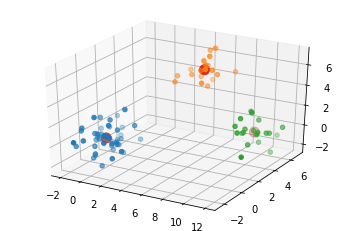

In [9]:
import random
import numpy as np
import matplotlib.pyplot as plt

"""
def kmeans(points, k, max_iters=10):
    
    return labels,centroids (각 점이 몇 번째 클러스터에 속하는지)

    labels[i]의 값은 points[i]이 속한 cluster 번호
    centroids[j]는  j번째 cluster 의 center
    1. random하게 중심적 선택 (forgy: 데이터에서 랜덤하게 점을 선택)
    2. 각 점이 어느 중심점에 가장 가까운지 계산
    3. 각각의 중심점에 속한 점들을 평균내서 새로운 중심점 계산
    4. 2-3을 반복하다가, 더이상 클러스터에 변화가 없을 경우 종료
"""

def kmeans(k, points):
    prev_assignment = []
    #1. 임의로 k개의 점을 중심점으로 선택 (forgy)
    new_centroids = points[np.random.choice(points.shape[0], replace=False, size=k)]
    for epoch in range(10):
        #2. 각 점이 할당될 중심점을 계산
        assignments = [assign(p, new_centroids, k) for p in points]

        #3. 새로운 centroid 계산
        new_centroids = compute_centroids(assignments, points, k)

        #4. 클러스터에 변화가 없을 경우 종료
        if prev_assignment == assignments:
            break
        prev_assignment = assignments

    return assignments, new_centroids

def assign(point, new_centroids, k):
    return min(range(k), key=lambda i: np.dot(new_centroids[i]-point, new_centroids[i]-point))

def compute_centroids(assignments, points, k):
    vec_sum = [np.zeros(len(points[0])) for _ in range(k)]
    counts = [0] * k

    for i, p in zip(assignments, points):
        vec_sum[i] += p
        counts[i] += 1

    return [vec_sum[i]/counts[i] if counts[i] > 0 else random.choice(points) for i in range(k)]

# 데이터 생성
k = 3  # 3차원
points = [np.random.randn(k) for _ in range(50)] 
points.extend([np.random.randn(k) + np.array([5, 5, 5]) for _ in range(20)]) 
points.extend([np.random.randn(k) + np.array([10, 5, 0]) for _ in range(20)])
points = np.array(points)

#kmeans 실행
assignments, new_centroids = kmeans(k, points)

#결과 확인
fig = plt.figure()
ax = fig.gca(projection='3d')

# ax.scatter(points[:0], points[:1], points[:2])
# plt.show()

clusters = [[] for _ in range(k)]
for a, p in zip(assignments, points):
    clusters[a].append(p)

for cluster in clusters:
    ax.scatter(*zip(*cluster))

ax.scatter(*zip(*new_centroids), s=100)
plt.show()




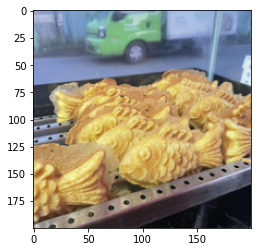

In [12]:
from PIL import Image

#사진 불러오기 & 크기 조절 & 화면에 출력
im = Image.open("IMG_6186.jpg")

width = 200
height = im.height * width // im.width
im = im.resize((width, height))

plt.imshow(im)
plt.show()


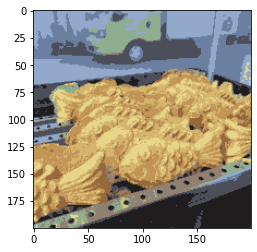

In [14]:
#데이터 준비 & kmean 알고리즘 적용
pixels = np.array(im).reshape(-1, 3)
assignments, new_centroids = kmeans(10, pixels)

#모든 픽셀의 색을 new_centroid 중 하나로 선택
for a, i in zip(assignments, range(pixels.shape[0])):
    pixels[i] = new_centroids[a]

#바뀐 그림 출력
im_remastered = Image.fromarray(pixels.reshape(im.height, im.width, 3), 'RGB')
plt.imshow(im_remastered)
plt.show()